In [1]:
from pathlib import Path

import matplotlib.pyplot as plt

from fim.data.utils import load_h5

In [2]:
data_dir = Path(
    "/Users/patrickseifner/repos/FIM/data/processed/train/processed/train/test_vfs_at_obs/train/25k_train_dim_2_clean_chunk_2/delta_tau_1e-1_100_paths_length_128_num_realiz_33"
)

index = 5
num_paths = 20

locations = load_h5(data_dir / "locations.h5")[index]
drift_at_locations = load_h5(data_dir / "drift_at_locations.h5")[index]
diffusion_at_locations = load_h5(data_dir / "diffusion_at_locations.h5")[index]

obs_values = load_h5(data_dir / "obs_values.h5")[index, :num_paths]
drift_at_obs_values = load_h5(data_dir / "drift_at_obs_values.h5")[index, :num_paths]
diffusion_at_obs_values = load_h5(data_dir / "diffusion_at_obs_values.h5")[index, :num_paths]

print("locations: ", locations.shape)
print("drift_at_locations: ", drift_at_locations.shape)
print("diffusion_at_locations: ", diffusion_at_locations.shape)
print("obs_values: ", obs_values.shape)
print("drift_at_obs_values: ", drift_at_obs_values.shape)
print("diffusion_at_obs_values: ", diffusion_at_obs_values.shape)

locations:  torch.Size([2025, 2])
drift_at_locations:  torch.Size([2025, 2])
diffusion_at_locations:  torch.Size([2025, 2])
obs_values:  torch.Size([20, 128, 2])
drift_at_obs_values:  torch.Size([20, 128, 2])
diffusion_at_obs_values:  torch.Size([20, 128, 2])


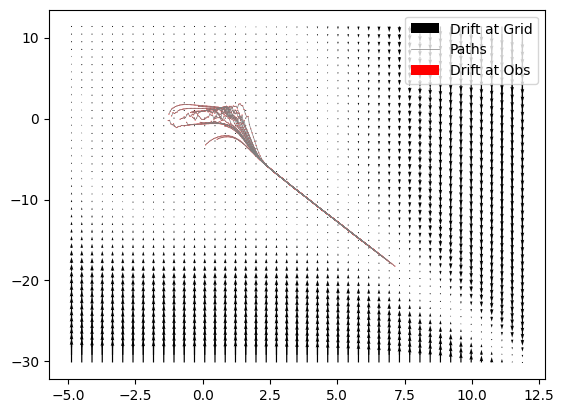

In [6]:
quiver = plt.quiver(locations[:, 0], locations[:, 1], drift_at_locations[:, 0], drift_at_locations[:, 1], label="Drift at Grid")
quiver._init()

for path in range(num_paths):
    plt.plot(obs_values[path, :, 0], obs_values[path, :, 1], linewidth=0.5, color="grey", label="Paths" if path == 0 else None)

obs_values_locations = obs_values.reshape(-1, 2)
drift_at_obs_values = drift_at_obs_values.reshape(-1, 2)

plt.quiver(
    obs_values_locations[:, 0],
    obs_values_locations[:, 1],
    drift_at_obs_values[:, 0],
    drift_at_obs_values[:, 1],
    scale=quiver.scale,
    label="Drift at Obs",
    color="red",
)

plt.legend()
plt.show()

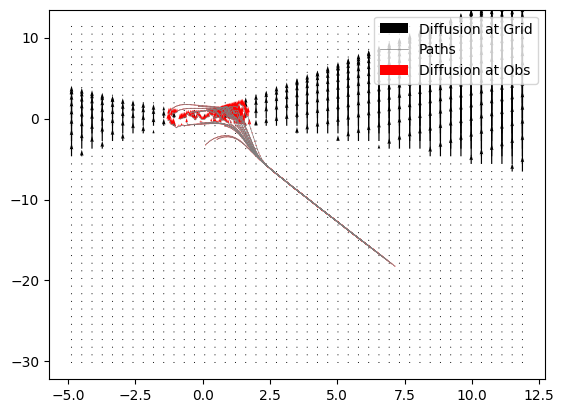

In [5]:
quiver = plt.quiver(locations[:, 0], locations[:, 1], diffusion_at_locations[:, 0], diffusion_at_locations[:, 1], label="Diffusion at Grid")
quiver._init()

for path in range(num_paths):
    plt.plot(obs_values[path, :, 0], obs_values[path, :, 1], linewidth=0.5, color="grey", label="Paths" if path == 0 else None)

obs_values_locations = obs_values.reshape(-1, 2)
diffusion_at_obs_values = diffusion_at_obs_values.reshape(-1, 2)

plt.quiver(
    obs_values_locations[:, 0],
    obs_values_locations[:, 1],
    diffusion_at_obs_values[:, 0],
    diffusion_at_obs_values[:, 1],
    scale=quiver.scale,
    label="Diffusion at Obs",
    color="red",
)

plt.legend()
plt.show()